# 1.검증 데이터의 적절성 확인
  - 검증 데이터 품질 개선에 따라, 테스트 성능이 향상 될 수 있는 지 확인이 목적
  - Hold Out Data를 활용한 검증과 Augmented Data를 활용한 검증에 대해서 각각 확인

## A. Hold - Out Data를 활용한 검증 확인

![image](https://user-images.githubusercontent.com/86637320/227261350-6ab2fd68-2ebf-4b68-aa1e-402900340f20.png)
- 노란색 부분 : 검증 데이터의 Label 분포

- `검증, 테스트 데이터에 대한 모델 Loss 차이가 없다`는 귀무 가설 하, T 검정 실시
  - 검증, 테스트 데이터에 대한 평균 Loss 비교를 통해, 검증 데이터 개선 시 예측 성능 향상을 기대할 수 있는 지 확인하기 위함
  - T 검정 시, `표본 평균의 정규성 보장`을 위해 각 Epoch 마다 얻을 수 있는 모델의 Loss를 표본 크기 `30`으로 추출 후 확인

### 1) N = 30으로 Loss를 추출하기 위해, 모델 재 학습
- 모델의 하이퍼 파라미터
  - `eps` : 1e-8
  - `grad_norm` 1
  - `lr` 3e-5
  - `max_length` 128
  - `train_batch_size` 32
  - `linear_warump_scheduler - warm_up_ratio` 0
  - `weight decay` 0.01

In [ ]:
!git clone https://github.com/woodywarhol9/KoELECTRA.git

Cloning into 'KoELECTRA'...
remote: Enumerating objects: 684, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 684 (delta 137), reused 118 (delta 113), pack-reused 515
Receiving objects: 100% (684/684), 55.97 MiB | 23.53 MiB/s, done.
Resolving deltas: 100% (443/443), done.


In [ ]:
cd "/content/KoELECTRA/finetune"

/content/KoELECTRA/finetune


- 패키지 설치

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 748.8/748.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 57.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.1 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16179 sha256=73ae56c4e842f91f1a50d7a8f6fa186267b72c8a72f1b40690f9d5dd50a7ade1
  Stored in directory: /root/.cache/pip/wheels/ad/5c/ba/05fa33fa5855777b7d686e843ec07452f22a66a138e290e732
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=

In [ ]:
%run run_seq_cls.py --task korsts --config_file koelectra-base-v3.json

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


- 학습 결과 저장

In [ ]:
from google.colab import files

In [ ]:
!zip -r /content/dev.zip /content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev

  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/ (stored 0%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-1168.txt (deflated 52%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-2336.txt (deflated 51%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-292.txt (deflated 51%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-584.txt (deflated 51%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-2628.txt (deflated 51%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-2920.txt (deflated 51%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-1752.txt (deflated 51%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-1460.txt (deflated 51%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/dev/dev-8

In [ ]:
!zip -r /content/test.zip /content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test

  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/ (stored 0%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/test-876.txt (deflated 45%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/test-2044.txt (deflated 45%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/test-1752.txt (deflated 46%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/test-584.txt (deflated 44%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/test-2336.txt (deflated 45%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/test-1460.txt (deflated 45%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/test-1168.txt (deflated 44%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt/test/test-2628.txt (deflated 44%)
  adding: content/KoELECTRA/finetune/ckpt/koelectra-base-v3-kors

In [ ]:
files.download("/content/dev.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("/content/test.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 2) Loss 데이터 확인

In [ ]:
!unzip -qq "/content/dev.zip"

In [ ]:
!unzip -qq "/content/test.zip"

- DataFrame으로 변경

In [ ]:
def file_to_df(f_dir, df, epoch, is_eval = True):
  with open (f_dir, "r") as f:
    data = f.readlines()
    data = [x.strip() for x in data]
    # 데이터 추출
    pearson = re.sub("[^\d*\.?\d+]","",data[2])
    loss = list(map(float, data[1][6:][2:-2].strip().split(",")))
    df.loc[len(df)] = [epoch, re.sub("[^\d*\.?\d+]","",data[2]), loss, is_eval]

import os
import natsort # 파일명 정렬
import pandas as pd
import re

df = pd.DataFrame(columns = ["epoch", "pearson", "loss", "is_eval"])
dir_path = "content/KoELECTRA/finetune/ckpt/koelectra-base-v3-korsts-ckpt"
for dir in os.listdir(dir_path):
  file_path = os.path.join(dir_path, dir)
  epoch = 0
  for f in natsort.natsorted(os.listdir(file_path)):
    print(f)
    epoch += 1
    if dir == "dev":
      file_to_df(os.path.join(file_path, f), df, epoch)
    else:
      file_to_df(os.path.join(file_path, f), df, epoch, False)

dev-292.txt
dev-584.txt
dev-876.txt
dev-1168.txt
dev-1460.txt
dev-1752.txt
dev-2044.txt
dev-2336.txt
dev-2628.txt
dev-2920.txt
test-292.txt
test-584.txt
test-876.txt
test-1168.txt
test-1460.txt
test-1752.txt
test-2044.txt
test-2336.txt
test-2628.txt
test-2920.txt


- 마지막 표본은 N = 30이 아니기 때문에 제거

In [ ]:
import numpy as np

df['loss'] = df['loss'].apply(lambda x : x[:-1])
df['loss_mean'] = df['loss'].apply(lambda x : np.mean(x))
df['loss_std'] = df['loss'].apply(lambda x : np.std(x))
df['loss_var'] = df['loss'].apply(lambda x : np.var(x))
df['pearson'] = df['pearson'].apply(lambda x : float(x[:8]))

#### 검증 - 테스트 데이터에서의 Loss 변화 그래프
 - `검증 데이터`와 `테스트 데이터`의 `양상`이 다르다는 것을 `예측 가능`

<Axes: xlabel='epoch', ylabel='pearson'>

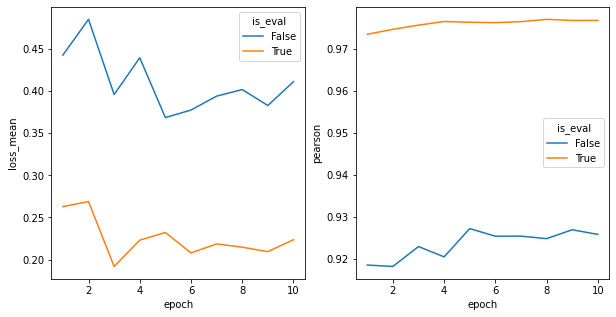

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sns.lineplot(data = df, x = "epoch", y = "loss_mean", hue = "is_eval", ax = axs[0])
sns.lineplot(data = df, x = "epoch", y = "pearson", hue = "is_eval", ax = axs[1])

### 3) Loss 데이터를 활용한 T - 검정
- 동일 모델 하, 독립적인 데이터로 얻은 결과를 분석하기 때문에 `2 - sample T 검정`을 활용

In [ ]:
# 검증 - 테스트 분리
eval_df = df[["epoch", "pearson", "loss", "loss_mean", "loss_std", "loss_var"]].loc[df.is_eval == True].reset_index()
test_df = df[["epoch", "pearson", "loss", "loss_mean", "loss_std", "loss_var"]].loc[df.is_eval == False].reset_index()

#### 정규성?
- N = 30으로 추출된 표본이기에, 표본 평균의 분포는 정규 분포를 따름

#### 등분산성?
- Barlett Test을 활용한 검정
  - H0 : `두 집단의 모 분산이 일치한다.`



- 다만 검증할 Loss의 분산 차이가 매우 작아, 높은 검정력까진 확보 불가
- 실제로 0.008의 차이를 80%의 검정력, `0.05`의 유의 수준으로 확인하려면 표본의 크기는 `245277`이 돼야 함
- 현재 표본 크기에서의 검정력은 `5%`

In [ ]:
print(f"실제 검증 - 테스트 데이터 사이의 분산 차 : {abs(eval_df.loc[2].loss_var - test_df.loc[2].loss_var)}")

실제 검증 - 테스트 데이터 사이의 분산 차 : 0.008107566294233027


In [ ]:
from statsmodels.stats.power import TTestIndPower
# 검증하고 싶은 차이
effect = 0.008
# 유의 수준
alpha = 0.05
# 샘플 수
nobs1 = 30
# 검정력
power = 0.8

analysis = TTestIndPower()
Power = analysis.solve_power(effect, nobs1=nobs1, ratio=1.0, alpha=alpha)
N_size = analysis.solve_power(effect, power=power, alpha=alpha)

print(f"검정력 : {Power} / 필요 표본의 크기 : {N_size}")

검정력 : 0.050106387789232286 / 필요 표본의 크기 : 245277.85128585636


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


- `검정력`이 낮기 때문에, 모든 Epoch에서의 p-value를 확인해 보완
- 모든 Epoch에서 p - value는 `0.05` 보다 작기 때문에 `0.05`의 유의 수준에서 $H_0$를 기각하는 것이 더 타당하다고 생각
- 이를 통해 `검증`, `테스트 데이터` 각각으로 인한 `Loss`의 `모 분산`이 `다르다`고 판단

In [ ]:
from scipy.stats import bartlett

for i in range(10):
  print(f"{i} Epoch 결과 : {bartlett(eval_df.loc[i].loss, test_df.loc[i].loss)}")

0 Epoch 결과 : BartlettResult(statistic=11.475177634446133, pvalue=0.000705319056158657)
1 Epoch 결과 : BartlettResult(statistic=8.021375559302411, pvalue=0.0046228445576720276)
2 Epoch 결과 : BartlettResult(statistic=7.387953633444144, pvalue=0.006566215166491599)
3 Epoch 결과 : BartlettResult(statistic=5.839411368740212, pvalue=0.015671068471172698)
4 Epoch 결과 : BartlettResult(statistic=5.13199679221258, pvalue=0.023488690600947375)
5 Epoch 결과 : BartlettResult(statistic=6.072235798383919, pvalue=0.013732302781695932)
6 Epoch 결과 : BartlettResult(statistic=4.475589015466261, pvalue=0.034382349442549184)
7 Epoch 결과 : BartlettResult(statistic=6.197548240128902, pvalue=0.012792740054553985)
8 Epoch 결과 : BartlettResult(statistic=5.902597723780315, pvalue=0.015118570727809283)
9 Epoch 결과 : BartlettResult(statistic=6.168044574022197, pvalue=0.013007830895216111)


#### T - 검정 실시
- 2 sample T - test
  - $H0$ : `두 집단의 모 평균은 차이가 없다.`

- 다만 검증할 Loss의 평균 차이가 작아, 높은 검정력까진 확보 불가
- 실제로 0.2의 차이를 80%의 검정력으로 확인하려면 표본의 크기는 `393`이 돼야 함
- 현재 표본 크기에서의 검정력은 `11`% 정도

In [ ]:
eval_df

,index,epoch,pearson,loss,loss_mean,loss_std,loss_var
0,0,1,0.973424,"[0.1628936529159546, 0.2335672825574875, 0.260...",0.262899,0.077844,0.006060
1,1,2,0.974594,"[0.16736622154712677, 0.2483328878879547, 0.28...",0.268821,0.095571,0.009134
2,2,3,0.975597,"[0.10536278784275055, 0.18684439361095428, 0.1...",0.191820,0.073116,0.005346
3,3,4,0.976463,"[0.13914942741394043, 0.20487816631793976, 0.2...",0.223031,0.080223,0.006436
4,4,5,0.976284,"[0.1454591155052185, 0.19675865769386292, 0.23...",0.232158,0.078116,0.006102
5,5,6,0.976192,"[0.10866416990756989, 0.20186740159988403, 0.2...",0.207912,0.072038,0.005189
6,6,7,0.976433,"[0.12176549434661865, 0.20022456347942352, 0.1...",0.218589,0.076656,0.005876
7,7,8,0.976974,"[0.11449621617794037, 0.1944740265607834, 0.19...",0.214656,0.074278,0.005517
8,8,9,0.976712,"[0.10767045617103577, 0.19782310724258423, 0.1...",0.209411,0.071608,0.005128
9,9,10,0.976726,"[0.1192220151424408, 0.21426250040531158, 0.20...",0.223547,0.075217,0.005658


In [ ]:
test_df

,index,epoch,pearson,loss,loss_mean,loss_std,loss_var
0,10,1,0.918497,"[0.3649213910102844, 0.8419622182846069, 0.551...",0.442762,0.137675,0.018954
1,11,2,0.918168,"[0.3656904399394989, 0.903342604637146, 0.6311...",0.485198,0.154480,0.023864
2,12,3,0.922898,"[0.24295754730701447, 0.7288406491279602, 0.48...",0.395952,0.115989,0.013453
3,13,4,0.920449,"[0.29014143347740173, 0.7694106698036194, 0.52...",0.439579,0.121054,0.014654
4,14,5,0.927175,"[0.29248279333114624, 0.6899402737617493, 0.44...",0.368591,0.114925,0.013208
5,15,6,0.925365,"[0.2539677619934082, 0.6782565116882324, 0.480...",0.377511,0.109572,0.012006
6,16,7,0.925380,"[0.24957527220249176, 0.6911751627922058, 0.51...",0.394032,0.109959,0.012091
7,17,8,0.924786,"[0.25586172938346863, 0.7257125973701477, 0.51...",0.401844,0.113457,0.012873
8,18,9,0.926897,"[0.26486095786094666, 0.6923551559448242, 0.48...",0.382899,0.108291,0.011727
9,19,10,0.925795,"[0.28180748224258423, 0.7332982420921326, 0.51...",0.411192,0.114778,0.013174


In [ ]:
print(f"실제 검증 - 테스트 데이터 사이의 평균 차 : {abs(eval_df.loc[2].loss_mean - test_df.loc[2].loss_mean)}")

실제 검증 - 테스트 데이터 사이의 평균 차 : 0.20413222478103604


In [ ]:
from statsmodels.stats.power import TTestIndPower
# 검증하고 싶은 차이
effect = 0.2
# 유의 수준
alpha = 0.05
# 샘플 수
nobs1 = 30
# 검정력
power = 0.8

analysis = TTestIndPower()
Power = analysis.solve_power(effect, nobs1=nobs1, ratio=1.0, alpha=alpha)
N_size = analysis.solve_power(effect, power=power, alpha=alpha)

print(f"검정력 : {Power} / 필요 표본의 크기 : {N_size}")

검정력 : 0.1186794357860223 / 필요 표본의 크기 : 393.4056930002516


- 검정력이 낮기 때문에, 모든 Epoch에서의 p-value를 확인해 보완
- 모든 Epoch에서 p - value는 0.05 보다 작아  H0 를 기각하는 것이 더 타당하다고 생각
- 이를 통해 `검증`, `테스트 데이터` 각각으로 인한 `Loss`의 `모 평균`이 다르다고 판단

In [ ]:
from scipy.stats import ttest_ind

for i in range(10):
  t, p = ttest_ind(eval_df.loc[i].loss, test_df.loc[i].loss, equal_var = False) # 등분산 X
  print(f"Epoch {i + 1} 결과 | T값 : {t}, p-value : {p}")

Epoch 1 결과 | T값 : -5.058278774193652, p-value : 7.910949210977729e-05
Epoch 2 결과 | T값 : -5.389783464066954, p-value : 3.566019768619025e-05
Epoch 3 결과 | T값 : -6.762523773175123, p-value : 1.975012953254362e-06
Epoch 4 결과 | T값 : -6.845905368051473, p-value : 1.534731259523019e-06
Epoch 5 결과 | T값 : -4.533237048835244, p-value : 0.0002213582403383432
Epoch 6 결과 | T값 : -5.927518939068657, p-value : 1.0450786503781265e-05
Epoch 7 결과 | T값 : -6.078713572524376, p-value : 6.9506183431497615e-06
Epoch 8 결과 | T값 : -6.320433902542425, p-value : 4.5945557882716224e-06
Epoch 9 결과 | T값 : -6.132226778426269, p-value : 6.715541664861715e-06
Epoch 10 결과 | T값 : -6.262438275902454, p-value : 5.177343535101332e-06


### 4) 결론

![image](https://user-images.githubusercontent.com/86637320/227254019-7d38a4a6-54b6-43c3-b0ff-bdbbba9bcf03.png)

- `검증`, `테스트` 데이터에 대한 학습 양상과 T 검정 결과 모두 
- `검증`, `테스트`로 얻을 수 있는 모델 Loss의 분포가 다름을 의미함
- 이는 `검증` 데이터를 활용한 하이퍼 파라미터 튜닝이, `테스트` 데이터에서의 성능 향상으로 이어지지 않을 것이라고 보는 것이 타당 함

- `※ 추가 개선 고려 사항 ※`
  - 모집단의 분포와 무관하게, 표본 평균의 분포가 정규 분포를 따를 수 있도록 표본의 크기(Sample Size)`N`을 30으로 설정해서 검정을 진행했다.
  - 이때의 표본의 개수(Number of samples)는 `테스트` 데이터 기준 `17`개, `검증` 데이터 기준 : `66`개 정도로, 이상치에 의해 잘못된 결론을 얻었을 수도 있음
  - 이 경우, 표본의 크기를 줄이고, 그에 따라 표본의 개수를 늘린 다음 `비모수 검정`을 하는 것도 고려해볼 수 있음

## B. Augmented Data를 활용한 검증 확인

- `검증, 테스트 데이터에 대한 모델 Loss 차이가 없다`는 귀무 가설 하, 가설 검정 실시
  - 검증, 테스트 데이터에 대한 평균 Loss 비교를 통해, 검증 데이터 개선 시 예측 성능 향상을 기대할 수 있는 지 확인하기 위함

- 데이터 불러오기
  - [klue-sts-valid.csv](https://github.com/woodywarhol9/wanted-pre-onboarding/blob/main/%EA%B8%B0%EC%97%85%EA%B3%BC%EC%A0%9C/%EA%B8%B0%EC%97%85%EA%B3%BC%EC%A0%9C3/data/klue-sts-valid.csv) : `SBERT`를 활용한 Data Augmentation으로 새로 생성한 `검증` 데이터 
  - [klue-sts-test.csv](https://github.com/woodywarhol9/wanted-pre-onboarding/blob/main/%EA%B8%B0%EC%97%85%EA%B3%BC%EC%A0%9C/%EA%B8%B0%EC%97%85%EA%B3%BC%EC%A0%9C3/data/klue-sts-test.csv) : 기존 `테스트` 데이터

In [ ]:
import pandas as pd

valid_data = pd.read_csv("/content/klue-sts-valid.csv")
test_data = pd.read_csv("/content/klue-sts-test.csv")

- `검증` 데이터의 Label 분포 확인

<ipython-input-17-a59ea70e1ea8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valid_data['real_label'])


<Axes: xlabel='real_label', ylabel='Density'>

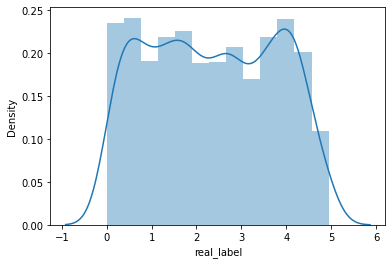

In [ ]:
import seaborn as sns

sns.distplot(valid_data['real_label'])

### 1) Loss를 추출하기 위해, 학습된 모델 불러와서 재 예측
- 기존에 저장한 1개의 모델에 대해 확인 진행
- 모델의 하이퍼 파라미터
  - `eps` : 1e-8
  - `grad_norm` 1
  - `lr` 3e-5
  - `max_length` 128
  - `train_batch_size` 32
  - `linear_warump_scheduler - warm_up_ratio` 0
  - `weight decay` 0.01

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("./drive/MyDrive/프리온보딩")

Mounted at /content/drive


In [ ]:
from torch.utils.data import Dataset, DataLoader, SequentialSampler

class CustomDataset(Dataset):
    """
    데이터 프레임의 입력을 받아 (input, target) 형태의 Dataset 생성
    """
    def __init__(self, data) -> None: 
        self.data = data            
        self.input, self.label = list(zip(self.data['sentence1'], self.data['sentence2'])), self.data['real_label']

    def __len__(self):
        return len(self.label) # len(y)

    def __getitem__(self, index):
        return self.input[index], self.label[index] # getitem 호출 시 tuple 형태로 x, y 반환

In [ ]:
def custom_collate_fn(batch):
    """
  한 배치 내 문장(input)들을 tokenizing 한 후 텐서로 변환함. 
    """
    global tokenizer
  
    input_list, target_list = zip(*batch) #(input_list, target_list)를 list가 감싸고 있기 때문에 unpacking(*) 후에 zip으로 할당
    tensorized_input = tokenizer.batch_encode_plus(
        # input_list
        [(sentences[0], sentences[1]) for sentences in input_list],
        max_length = 128, # model_setting
        padding= "max_length",
        add_special_tokens=True,
        truncation=True,
        return_tensors='pt',
    )
    
    tensorized_label = torch.tensor(target_list)
  
    return tensorized_input, tensorized_label

In [ ]:
valid_dataset = CustomDataset(valid_data)
test_dataset = CustomDataset(test_data)

#### N = 5로 Loss 추출
- Sample Size(표본의 크기)를`N` = 30 으로 설정할 경우 Number of samples(표본의 개수)가 적어짐
- 생성된 `검증` 데이터의 경우, 노이즈가 많을 수 밖에 없는데, 표본의 개수까지 적다면 검정의 정확도가 떨어질 것이라고 판단
- 따라서 표본의 크기 `N`을 5로 추출하여, 표본의 개수를 늘림
- 다만 이 경우, 표본 평균의 분포를 가정할 수 없기에 `비모수 검정` 활용  

In [ ]:
valid_dataloader = DataLoader(valid_dataset, batch_size = 5, sampler = SequentialSampler(valid_dataset), collate_fn = custom_collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size = 5, sampler = SequentialSampler(test_dataset), collate_fn = custom_collate_fn)

In [ ]:
from transformers import ElectraForSequenceClassification, ElectraTokenizer

model = ElectraForSequenceClassification.from_pretrained("./final_model/best_model")
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

In [ ]:
import torch
# device type
def set_device():
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"# available GPUs : {torch.cuda.device_count()}")
        print(f"GPU name : {torch.cuda.get_device_name()}")
    else:
        device = torch.device("cpu")
    return device
device = set_device()
device

# available GPUs : 1
GPU name : Tesla T4


device(type='cuda')

In [ ]:
from scipy.stats import pearsonr
from sklearn.metrics import f1_score
import numpy as np

def test(model, dataloader, device):    
    """
    훈련된 모델의 Test Dataset 성능을 확인합니다.
    """  
    model.to(device)
    model.eval()
    
    total_loss = 0
    batch_count, batch_loss = 0, 0
    preds_np = None

    loss_list = []

    for step, batch in enumerate(dataloader):       
        batch_count += 1
        batch = tuple(item.to(device) for item in batch)

        batch_input, batch_label = batch

        with torch.no_grad():
            outputs = model(**batch_input, labels = batch_label)
    
        loss = outputs.loss
        preds = outputs.logits.squeeze()

        
        # 모델 예측 값과 Label 값 저장.
        if preds_np is None:
            preds_np = preds.detach().cpu().numpy()
            labels_np = batch_label.detach().cpu().numpy()
        else:
            preds_np = np.append(preds_np, preds.detach().cpu().numpy(), axis=0)
            labels_np = np.append(labels_np, batch_label.detach().cpu().numpy(), axis=0)
        
        batch_loss += loss.item()
        total_loss += loss.item()
        loss_list.append(loss.item())
                        
    total_valid_loss = total_loss / (step + 1)

    p_score = pearsonr(preds_np, labels_np)[0] * 100
    print(f"Pearsonr : {p_score}")
    # 마지막은 N = 30이 아니기 때문에 제외
    return loss_list[:-1], p_score

In [ ]:
print("Valid 데이터 : ", end = "")
loss_list_valid, p_score_valid = test(model, valid_dataloader, device)
print("Test 데이터 : ", end = "")
loss_list_test, p_score_test = test(model, test_dataloader, device)

Valid 데이터 : Pearsonr : 97.4004252908394
Test 데이터 : Pearsonr : 93.31220943964831


### 2) Loss 데이터 확인

In [ ]:
import numpy as np

df = pd.DataFrame()
df['loss_eval'] = [loss_list_valid]
df['loss_test'] = [loss_list_test]
df['pearson_eval'] = p_score_valid
df['pearson_test'] = p_score_test

df['loss_mean_eval'] = df['loss_eval'].apply(lambda x : np.mean(x))

df['loss_mean_test'] = df['loss_test'].apply(lambda x : np.mean(x))

#### 검증 - 테스트 데이터에서의 Loss 분포 확인하기
- `검증` 데이터의 Loss 분포 양상이 `테스트` 데이터와 많이 다름을 확인할 수 있음
- 생성한 `검증` 데이터이기에, 기본적으로 노이즈함    

Text(0.5, 1.0, 'Test Loss')

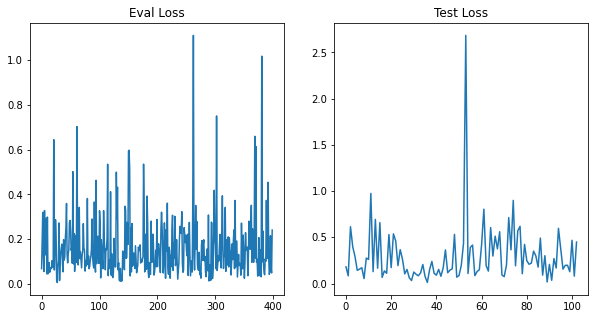

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(*df['loss_eval'])
axs[0].set_title("Eval Loss")
axs[1].plot(*df['loss_test'])
axs[1].set_title("Test Loss")

### 3) Loss 데이터를 활용한 Mann-Whitney U Test

`Mann-Whitney U Test`?
- `2 sample T Test`에 대응하는 비모수 검정법
- 두 집단의 순위를 활용해 순위 합을 구하고, 그 차이가 유의한 지 확인
- 분포에 대한 가정 없이, 검정이 가능

#### U - Test 실시

- $H0$ : `두 집단의 모집단 사이 차이가 없다.`
- `p-value`는 `5 * 1e-8`으로 `0.05`의 유의 수준 하 $H0$를 기각할 수 있음
- 이를 통해 `검증`, `테스트` 데이터 각각으로 인한 `Loss` 모집단이 다르다고 판단

In [ ]:
from scipy.stats import mannwhitneyu

mannwhitneyu(*df['loss_eval'], *df['loss_test'])

MannwhitneyuResult(statistic=13428.0, pvalue=5.8028261671615166e-08)

### 4) 결론

![image](https://user-images.githubusercontent.com/86637320/227470317-fe069fef-f568-4ae5-9f4d-1b37a196dc93.png)


- `검증`, `테스트` 데이터에 대한 모델의 `Loss` 분포는, 시각적으로도 또 수치적으로 차이가 있다고 보는 것이 타당함
- 이를 통해 `Augmented Data`를 활용한 하이퍼 파라미터 튜닝이, 테스트 데이터에서의 성능 향상으로 이어지지 않을 것으로 판단 가능 
- 다만 `검증` 데이터의 품질 개선으로 `테스트` 데이터의 양상을 더 잘 나타낼 수 있을 경우, `검증` 데이터를 활용한 하이퍼 파라미터 튜닝이 `테스트` 데이터 성능 개선으로 이어질 것으로 기대 가능

# 2.검증 - 테스트 데이터에서의 실제 성능 양상 확인

- 동일 모델 기준, Augmented Data를 활용한 `검증` 및 `테스트`에서 어느 정도의 성능이 나오는지 확인
- 실제 데이터를 통해 `검정` 결과(`검증`, `테스트`의 Loss 분포가 다름)를 확인해 보는 것이 목적 
- [wandb에 기록된 `검증` 성능](https://wandb.ai/woodywarhol99/monologg-sts-20000/reports/KLUE-STS--VmlldzoxOTI2NTYx?accessToken=t06zas1bur5nonwol5ql1r4hwv4f58jxm3l0zwi7y8hq5cg8earwkj5cxmo8sn6d)과 실제 `테스트` 성능 사이 비교

![image](https://user-images.githubusercontent.com/86637320/166138953-bd81cd59-2c45-4a6b-a274-531f3a976099.png)

## A. 데이터 불러오기

### 1) 테스트 데이터에 대한 모델 결과 불러오기

- PC에 csv 파일로 따로 저장해 별도의 이름 변경 작업 필요

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
test = pd.read_csv("monologg-sts-test.csv")
test = test.drop(["Unnamed: 0"], axis = 1).rename(columns = {"val_loss" : "test_loss", "f1_score" : "test_f1_score", "pearsonr" : "test_pearsonr"})
test["name"] = test['name'].apply(lambda x : str(x).split("/")[2])
test['name'] = test['name'].apply(lambda x : "-".join(str(x).split("-")[:4]))

In [3]:
test

,name,test_loss,test_f1_score,test_pearsonr
0,sparkling-sweep-7-9,0.314946,85.654886,93.017024
1,fast-sweep-5-2,0.446036,84.765625,91.994137
2,sparkling-sweep-7-3,0.442770,85.487078,92.034039
3,twilight-sweep-10-5,0.348137,84.552846,92.695814
4,comic-sweep-9-6,0.338825,84.959350,92.841258
...,...,...,...,...
95,comic-sweep-9-0,0.477055,84.812623,90.847050
96,comic-sweep-9-1,0.638054,82.264151,90.179094
97,twilight-sweep-10-8,0.319049,85.132383,92.958405
98,astral-sweep-3-4,0.360022,85.943775,92.258432


### 2) 검증 데이터에 대한 모델 결과 불러오기
  - 기록된 모델들
    - dazzling-1
    - fearless-2
    - astral-3
    - copper-4
    - fast-5
    - giddy-6
    - sparkling-7
    - helpful-8
    - comic-9
    - twilight-10

- wandb에서 기록된 결과 다운로드 받아와서 확인
- 각 행의 결과가 Epoch 별 결과

In [4]:
val_loss = pd.read_csv("val_loss.csv")
val_pearsonr = pd.read_csv("pearsonr.csv")
val_f1 = pd.read_csv("f1_score.csv")
val_loss

,Step,twilight-sweep-10 - total_valid_loss,twilight-sweep-10 - total_valid_loss__MIN,twilight-sweep-10 - total_valid_loss__MAX,comic-sweep-9 - total_valid_loss,comic-sweep-9 - total_valid_loss__MIN,comic-sweep-9 - total_valid_loss__MAX,helpful-sweep-8 - total_valid_loss,helpful-sweep-8 - total_valid_loss__MIN,helpful-sweep-8 - total_valid_loss__MAX,...,copper-sweep-4 - total_valid_loss__MAX,astral-sweep-3 - total_valid_loss,astral-sweep-3 - total_valid_loss__MIN,astral-sweep-3 - total_valid_loss__MAX,fearless-sweep-2 - total_valid_loss,fearless-sweep-2 - total_valid_loss__MIN,fearless-sweep-2 - total_valid_loss__MAX,dazzling-sweep-1 - total_valid_loss,dazzling-sweep-1 - total_valid_loss__MIN,dazzling-sweep-1 - total_valid_loss__MAX
0,11,0.352640,0.352640,0.352640,0.191461,0.191461,0.191461,0.277197,0.277197,0.277197,...,0.207574,0.209491,0.209491,0.209491,0.151885,0.151885,0.151885,0.197982,0.197982,0.197982
1,23,0.140768,0.140768,0.140768,0.223999,0.223999,0.223999,0.132750,0.132750,0.132750,...,0.141717,0.157893,0.157893,0.157893,0.162219,0.162219,0.162219,0.199767,0.199767,0.199767
2,35,0.123681,0.123681,0.123681,0.131621,0.131621,0.131621,0.120084,0.120084,0.120084,...,0.141851,0.124738,0.124738,0.124738,0.185822,0.185822,0.185822,0.122156,0.122156,0.122156
3,47,0.131809,0.131809,0.131809,0.106820,0.106820,0.106820,0.104457,0.104457,0.104457,...,0.145309,0.107852,0.107852,0.107852,0.119553,0.119553,0.119553,0.116131,0.116131,0.116131
4,59,0.105063,0.105063,0.105063,0.099872,0.099872,0.099872,0.099499,0.099499,0.099499,...,0.121435,0.111105,0.111105,0.111105,0.115568,0.115568,0.115568,0.128595,0.128595,0.128595
5,71,0.095339,0.095339,0.095339,0.098275,0.098275,0.098275,0.099340,0.099340,0.099340,...,0.096718,0.089958,0.089958,0.089958,0.115012,0.115012,0.115012,0.108096,0.108096,0.108096
6,83,0.104939,0.104939,0.104939,0.090451,0.090451,0.090451,0.087082,0.087082,0.087082,...,0.091955,0.089651,0.089651,0.089651,0.102971,0.102971,0.102971,0.106923,0.106923,0.106923
7,95,0.095172,0.095172,0.095172,0.088218,0.088218,0.088218,0.096088,0.096088,0.096088,...,0.091918,0.094902,0.094902,0.094902,0.098701,0.098701,0.098701,0.119245,0.119245,0.119245
8,107,0.094891,0.094891,0.094891,0.086781,0.086781,0.086781,0.087998,0.087998,0.087998,...,0.086764,0.088506,0.088506,0.088506,0.094574,0.094574,0.094574,0.099611,0.099611,0.099611
9,119,0.096358,0.096358,0.096358,0.085740,0.085740,0.085740,0.087996,0.087996,0.087996,...,0.086523,0.088650,0.088650,0.088650,0.094852,0.094852,0.094852,0.101145,0.101145,0.101145


In [5]:
cols_loss = ["twilight-sweep-10 - total_valid_loss", "comic-sweep-9 - total_valid_loss", "helpful-sweep-8 - total_valid_loss", "sparkling-sweep-7 - total_valid_loss", \
                    "giddy-sweep-6 - total_valid_loss", "fast-sweep-5 - total_valid_loss", "copper-sweep-4 - total_valid_loss", "astral-sweep-3 - total_valid_loss",\
                    "fearless-sweep-2 - total_valid_loss", "dazzling-sweep-1 - total_valid_loss"]

cols_pearsonr = ["twilight-sweep-10 - total_pearsonr", "comic-sweep-9 - total_pearsonr", "helpful-sweep-8 - total_pearsonr", "sparkling-sweep-7 - total_pearsonr", \
                    "giddy-sweep-6 - total_pearsonr", "fast-sweep-5 - total_pearsonr", "copper-sweep-4 - total_pearsonr", "astral-sweep-3 - total_pearsonr",\
                    "fearless-sweep-2 - total_pearsonr", "dazzling-sweep-1 - total_pearsonr"]

cols_f1 = ["twilight-sweep-10 - total_f1_score", "comic-sweep-9 - total_f1_score", "helpful-sweep-8 - total_f1_score", "sparkling-sweep-7 - total_f1_score", \
                    "giddy-sweep-6 - total_f1_score", "fast-sweep-5 - total_f1_score", "copper-sweep-4 - total_f1_score", "astral-sweep-3 - total_f1_score",\
                    "fearless-sweep-2 - total_f1_score", "dazzling-sweep-1 - total_f1_score"]


- 사용할 열만 가져오기

In [6]:
val_loss = val_loss[cols_loss]
val_pearsonr = val_pearsonr[cols_pearsonr]
val_f1 = val_f1[cols_f1]

## B. 결과 확인을 위해 검증 - 테스트 데이터 DF 합치기



- Sweep 별로 값 분리하기

In [7]:
test_1 = test.loc[test.name.str.contains("dazzling")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_2 = test.loc[test.name.str.contains("fearless")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_3 = test.loc[test.name.str.contains("astral")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_4 = test.loc[test.name.str.contains("copper")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_5 = test.loc[test.name.str.contains("fast")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_6 = test.loc[test.name.str.contains("giddy")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_7 = test.loc[test.name.str.contains("sparkling")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_8 = test.loc[test.name.str.contains("helpful")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_9 = test.loc[test.name.str.contains("comic")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)
test_10 = test.loc[test.name.str.contains("twilight")].sort_values(by = "name").reset_index().drop(['index'], axis = 1)

- 분리 후 하나의 df로 concat

In [8]:
test_1['val_loss'] = val_loss['dazzling-sweep-1 - total_valid_loss']
test_1['val_f1_score'] = val_f1['dazzling-sweep-1 - total_f1_score']
test_1['val_pearsonr'] = val_pearsonr["dazzling-sweep-1 - total_pearsonr"]
test_1['epoch'] = test_1.index + 1

test_2['val_loss'] = val_loss['fearless-sweep-2 - total_valid_loss']
test_2['val_f1_score'] = val_f1['fearless-sweep-2 - total_f1_score']
test_2['val_pearsonr'] = val_pearsonr["fearless-sweep-2 - total_pearsonr"]
test_2['epoch'] = test_2.index + 1

test_3['val_loss'] = val_loss['astral-sweep-3 - total_valid_loss']
test_3['val_f1_score'] = val_f1['astral-sweep-3 - total_f1_score']
test_3['val_pearsonr'] = val_pearsonr["astral-sweep-3 - total_pearsonr"]
test_3['epoch'] = test_3.index + 1

test_4['val_loss'] = val_loss['copper-sweep-4 - total_valid_loss']
test_4['val_f1_score'] = val_f1['copper-sweep-4 - total_f1_score']
test_4['val_pearsonr'] = val_pearsonr["copper-sweep-4 - total_pearsonr"]
test_4['epoch'] = test_4.index + 1

test_5['val_loss'] = val_loss['fast-sweep-5 - total_valid_loss']
test_5['val_f1_score'] = val_f1['fast-sweep-5 - total_f1_score']
test_5['val_pearsonr'] = val_pearsonr["fast-sweep-5 - total_pearsonr"]
test_5['epoch'] = test_5.index + 1

test_6['val_loss'] = val_loss['giddy-sweep-6 - total_valid_loss']
test_6['val_f1_score'] = val_f1['giddy-sweep-6 - total_f1_score']
test_6['val_pearsonr'] = val_pearsonr["giddy-sweep-6 - total_pearsonr"]
test_6['epoch'] = test_6.index + 1

test_7['val_loss'] = val_loss['sparkling-sweep-7 - total_valid_loss']
test_7['val_f1_score'] = val_f1['sparkling-sweep-7 - total_f1_score']
test_7['val_pearsonr'] = val_pearsonr["sparkling-sweep-7 - total_pearsonr"]
test_7['epoch'] = test_7.index + 1

test_8['val_loss'] = val_loss['helpful-sweep-8 - total_valid_loss']
test_8['val_f1_score'] = val_f1['helpful-sweep-8 - total_f1_score']
test_8['val_pearsonr'] = val_pearsonr["helpful-sweep-8 - total_pearsonr"]
test_8['epoch'] = test_8.index + 1

test_9['val_loss'] = val_loss['comic-sweep-9 - total_valid_loss']
test_9['val_f1_score'] = val_f1['comic-sweep-9 - total_f1_score']
test_9['val_pearsonr'] = val_pearsonr["comic-sweep-9 - total_pearsonr"]
test_9['epoch'] = test_9.index + 1

test_10['val_loss'] = val_loss['twilight-sweep-10 - total_valid_loss']
test_10['val_f1_score'] = val_f1['twilight-sweep-10 - total_f1_score']
test_10['val_pearsonr'] = val_pearsonr["twilight-sweep-10 - total_pearsonr"]
test_10['epoch'] = test_10.index + 1

In [13]:
model_outputs = pd.concat([test_1, test_2, test_3, test_4, test_5, test_6, test_7, test_8, test_9, test_10]).reset_index().drop(['index'], axis = 1)
model_outputs

,name,test_loss,test_f1_score,test_pearsonr,val_loss,val_f1_score,val_pearsonr,epoch
0,dazzling-sweep-1-0,0.613138,82.666667,89.462811,0.197982,88.833124,96.467023,1
1,dazzling-sweep-1-1,0.605983,81.647940,89.904005,0.199767,87.431694,96.726227,2
2,dazzling-sweep-1-2,0.359388,84.848485,91.879176,0.122156,92.938803,97.367814,3
3,dazzling-sweep-1-3,0.392920,85.657371,92.395255,0.116131,92.277487,97.680770,4
4,dazzling-sweep-1-4,0.403971,84.980237,92.537654,0.128595,91.856678,97.597465,5
...,...,...,...,...,...,...,...,...
95,twilight-sweep-10-5,0.348137,84.552846,92.695814,0.095339,93.758480,97.928750,6
96,twilight-sweep-10-6,0.357702,84.444444,92.609267,0.104939,93.640054,97.832545,7
97,twilight-sweep-10-7,0.322710,84.848485,92.985890,0.095172,94.053315,97.895722,8
98,twilight-sweep-10-8,0.319049,85.132383,92.958405,0.094891,94.004135,97.932744,9


## C. 결과 확인

### 1) Epoch 별 모델의 `검증`, `테스트` Loss 확인
- Loss 변화 양상이 다를 뿐 아니라, 수치 상에서도 큰 차이가 있음
- `검증`, `테스트`의 `Loss` 분포가 다름을 확인 가능

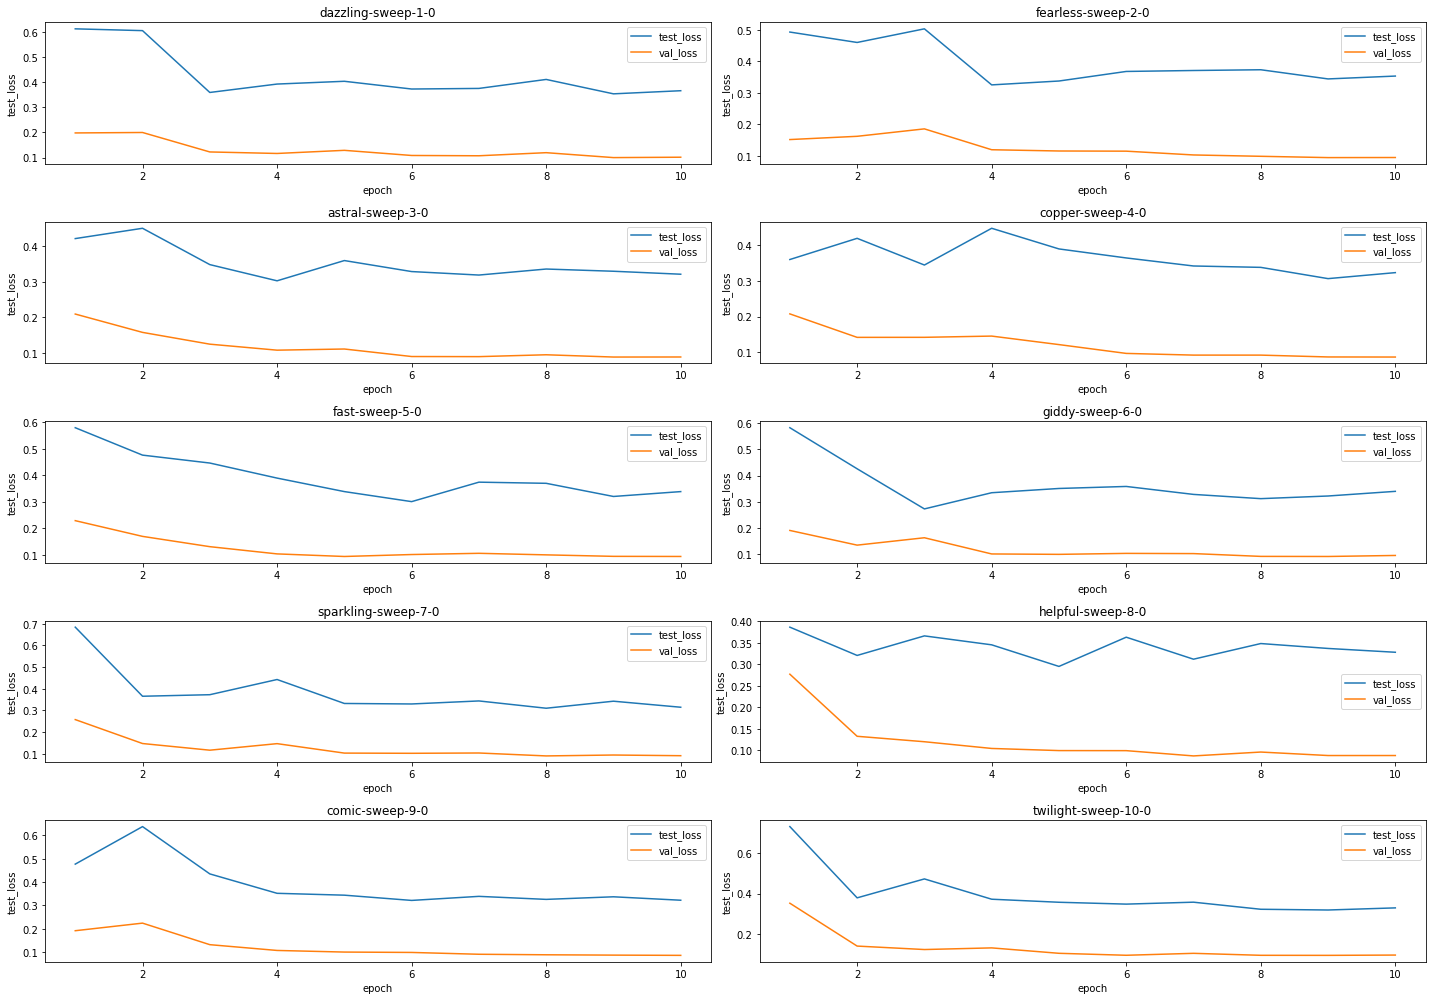

In [19]:
fig, axs = plt.subplots(5, 2, figsize = (20, 14))

for i in range(10):
  model_output = model_outputs.iloc[i*10:(i+1)*10].reset_index()
  ax = axs[i // 2][i % 2]
  sns.lineplot(data = model_output, x = "epoch", y = "test_loss", ax = ax, label = "test_loss")
  sns.lineplot(data = model_output, x = "epoch", y = "val_loss", ax = ax, label = "val_loss")
  ax.set_title(model_output.name[0])
  ax.legend()

plt.tight_layout()

### 2) `검증`, `테스트` Loss 기준 최고, 최저 성능 모델 양상 확인

- `검증` 모델의 경우 비교적 높은 `Epoch`에서 최대 성능 달성
- `훈련` 데이터를 통해 생성된 만큼, 어느 정도는 `훈련` 데이터에 과적합 돼있음


In [49]:
print(f"테스트 데이터 기준 상위 모델의 Epoch 평균 : {np.mean(model_outputs.sort_values(by = 'test_loss').head(10).epoch)}")
print(f"검증 데이터 기준 상위 모델의 Epoch 평균 : {np.mean(model_outputs.sort_values(by = 'val_loss').head(10).epoch)}")

테스트 데이터 기준 상위 모델의 Epoch 평균 : 6.9
검증 데이터 기준 상위 모델의 Epoch 평균 : 9.1
